In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import nltk

from nltk import tokenize
from nltk import TweetTokenizer

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from joblib import dump

## Funções que criam os modelos utilizando algortmos diferentes
O funcionamento delas são bem parecidos, o que muda é qual metodo do sklearn vai ser utilizado que corresponda aquele algortimo desejado.

As funções recebem como parametro os dados correspondente ao x e y de treino.

Com esses dados elas criam e treinam o modelo.

Realizam uma validação cruzada com 10 interações.

Retornam o modelo criado e treinado, e também os resultados da validação cruzada.

In [2]:
#Baseado em Naive Bayes Multinomial (MultinomoalNB)
def _MNB(X_treino, y_treino): 
    
    modelo_MNB = MultinomialNB()
    modelo_MNB.fit(X_treino, y_treino)
    
    resultados_MNB = cross_val_predict(modelo_MNB, X_treino, y_treino, cv = 10)

    return  modelo_MNB, resultados_MNB

In [3]:
#Regressão logistica (LosgisticRegression)
def _LR(X_treino, y_treino):
    
    modelo_LR = LogisticRegression(solver='lbfgs', max_iter=200, random_state=322, multi_class="multinomial")
    modelo_LR.fit(X_treino, y_treino)
    
    resultados_LR = cross_val_predict(modelo_LR, X_treino, y_treino, cv = 10)
    
    return modelo_LR, resultados_LR

In [4]:
#Máquinas de Vetores de Suporte(LinearSVC)
def _LSVM(X_treino, y_treino):
    
    modelo_LSVM = LinearSVC()
    modelo_LSVM.fit(X_treino, y_treino)
    
    resultados_LSVM = cross_val_predict(modelo_LSVM, X_treino, y_treino, cv = 10)
    
    return modelo_LSVM, resultados_LSVM

In [5]:
#Florestas Aleatórias(RancomForest)
def _RF(X_treino, y_treino):
    
    modelo_RF = RandomForestClassifier(n_estimators=100, random_state=142)
    modelo_RF.fit(X_treino, y_treino)
    
    resultados_RF = cross_val_predict(modelo_RF, X_treino, y_treino, cv = 10)
    
    return modelo_RF, resultados_RF

In [6]:
base_treino_teste = pd.read_csv("dados\\resultados\\base_treino_teste_processada.csv")

base_coletada = pd.read_csv("dados\\resultados\\base_coletada_processada.csv")

In [7]:
base_treino_teste = base_treino_teste.fillna('')

base_coletada = base_coletada.fillna('')

# Atribuindo dados de X de treino e y de treino

In [8]:
X_treino = base_treino_teste["Text"].values
y_treino = base_treino_teste['Classificacao'].values

# Transformando X de treino em uma matriz de frequências 

In [9]:
vectorizer = CountVectorizer(analyzer = "word")
X_treino_matriz = vectorizer.fit_transform(X_treino)

# Transformando a matriz de frequencia em uma matriz TFIDF

In [10]:
tfidf_transformer = TfidfTransformer()
X_treino_tfidf = tfidf_transformer.fit_transform(X_treino_matriz)

# Criação dos Modelos e Demonstração das Métricas de Validação Cruzada 

In [11]:
modelo_MNB, resultados_MNB  = _MNB(X_treino_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_treino_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_treino_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_treino_tfidf, y_treino)

# Acurácia (score) de cada modelo

In [12]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

print("MultinomialNB ->", score_MNB)
print("Regressão Logistica ->", score_LR)
print("Máquinas de Vetores de Suporte ->", score_LSVM)
print("Florestas Aleatórias ->", score_RF)

MultinomialNB -> 0.789101299408123
Regressão Logistica -> 0.8306007211374924
Máquinas de Vetores de Suporte -> 0.8421661337505952
Florestas Aleatórias -> 0.8290359888427784


# Armazenando as acurácias em um dataframe

In [13]:
score_modelos = pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Bruto"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])

# Métricas de validação resultante da validação cruzada 

### Naive Bayes

In [14]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_MNB, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.78      0.73      0.75      4900
    Negativo       0.71      0.89      0.79      4896
      Neutro       0.91      0.75      0.83      4903

    accuracy                           0.79     14699
   macro avg       0.80      0.79      0.79     14699
weighted avg       0.80      0.79      0.79     14699



### Regressão Logística

In [15]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_LR, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.80      0.81      0.81      4900
    Negativo       0.82      0.79      0.80      4896
      Neutro       0.87      0.89      0.88      4903

    accuracy                           0.83     14699
   macro avg       0.83      0.83      0.83     14699
weighted avg       0.83      0.83      0.83     14699



### SVM

In [16]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_LSVM, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.82      0.81      0.82      4900
    Negativo       0.81      0.81      0.81      4896
      Neutro       0.89      0.90      0.90      4903

    accuracy                           0.84     14699
   macro avg       0.84      0.84      0.84     14699
weighted avg       0.84      0.84      0.84     14699



### Random Forest

In [17]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_RF, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.85      0.74      0.79      4900
    Negativo       0.79      0.82      0.80      4896
      Neutro       0.85      0.93      0.89      4903

    accuracy                           0.83     14699
   macro avg       0.83      0.83      0.83     14699
weighted avg       0.83      0.83      0.83     14699



# Matriz de Confusão

### Naive Bayes

In [18]:
print(pd.crosstab(y_treino, resultados_MNB, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4352     134       410   4896
Neutro         644    3689       570   4903
Positivo      1125     217      3558   4900
All           6121    4040      4538  14699


### Regressão Logística

In [19]:
print(pd.crosstab(y_treino, resultados_LR, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      3870     342       684   4896
Neutro         255    4366       282   4903
Positivo       619     308      3973   4900
All           4744    5016      4939  14699


### SVM

In [20]:
print(pd.crosstab(y_treino, resultados_LSVM, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      3983     258       655   4896
Neutro         266    4418       219   4903
Positivo       657     265      3978   4900
All           4906    4941      4852  14699


### Random Forest

In [21]:
print(pd.crosstab(y_treino, resultados_RF, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4002     371       523   4896
Neutro         229    4536       138   4903
Positivo       835     417      3648   4900
All           5066    5324      4309  14699


## Avaliação do processamento de dados

### Tratamento de URLs

In [22]:
X_treino = base_treino_teste['URL']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [23]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["URLs"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Hashtags

In [24]:
X_treino = base_treino_teste['Hashtags']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [25]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Hashtags"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Menções

In [26]:
X_treino = base_treino_teste['Mencoes']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [27]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Menções"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Abreviações

In [28]:
X_treino = base_treino_teste['Abreviacoes']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [29]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Abreviações"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Emoticons

In [30]:
X_treino = base_treino_teste['Emoticons']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [31]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Emoticons"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Stopwords

In [32]:
X_treino = base_treino_teste['Stopwords']

tfidf_transformer = TfidfVectorizer(analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [33]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Stopwords"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Alem dos testes com pré-processamento, também sera feita um com bigramas

In [34]:
X_treino = base_treino_teste['Stopwords']

tfidf_transformer = TfidfVectorizer(ngram_range = (1, 2), analyzer = "word")
X_tfidf = tfidf_transformer.fit_transform(X_treino)

modelo_MNB, resultados_MNB  = _MNB(X_tfidf, y_treino)
modelo_LR, resultados_LR = _LR(X_tfidf, y_treino)
modelo_LSVM, resultados_LSVM = _LSVM(X_tfidf, y_treino)
modelo_RF, resultados_RF = _RF(X_tfidf, y_treino)

In [35]:
score_MNB = metrics.accuracy_score(y_treino, resultados_MNB)
score_LR = metrics.accuracy_score(y_treino, resultados_LR)
score_LSVM = metrics.accuracy_score(y_treino, resultados_LSVM)
score_RF = metrics.accuracy_score(y_treino, resultados_RF)

score_modelos = pd.concat([score_modelos, pd.DataFrame([[score_MNB, score_LR, score_LSVM, score_RF]], index=["Bigrama"], columns=["Naive Bayes", "Regressão Logística", "Máquina de Vetores de Suporte", "Floresta Aleatória"])])

### Conferindo as métricas de validação

In [36]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_MNB, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.85      0.88      0.86      4900
    Negativo       0.83      0.94      0.88      4896
      Neutro       0.90      0.75      0.82      4903

    accuracy                           0.86     14699
   macro avg       0.86      0.86      0.86     14699
weighted avg       0.86      0.86      0.86     14699



In [37]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_LR, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.96      0.96      0.96      4900
    Negativo       0.97      0.92      0.94      4896
      Neutro       0.89      0.94      0.91      4903

    accuracy                           0.94     14699
   macro avg       0.94      0.94      0.94     14699
weighted avg       0.94      0.94      0.94     14699



In [38]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_LSVM, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.96      0.97      0.96      4900
    Negativo       0.98      0.93      0.95      4896
      Neutro       0.91      0.94      0.92      4903

    accuracy                           0.95     14699
   macro avg       0.95      0.95      0.95     14699
weighted avg       0.95      0.95      0.95     14699



In [39]:
sentimentos = ["Positivo", "Negativo", "Neutro"]
print(metrics.classification_report(y_treino, resultados_RF, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.97      0.96      0.96      4900
    Negativo       0.97      0.93      0.95      4896
      Neutro       0.91      0.95      0.93      4903

    accuracy                           0.95     14699
   macro avg       0.95      0.95      0.95     14699
weighted avg       0.95      0.95      0.95     14699



In [40]:
print(pd.crosstab(y_treino, resultados_MNB, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4617     142       137   4896
Neutro         598    3673       632   4903
Positivo       332     255      4313   4900
All           5547    4070      5082  14699


In [41]:
print(pd.crosstab(y_treino, resultados_LR, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4491     377        28   4896
Neutro         141    4594       168   4903
Positivo         9     195      4696   4900
All           4641    5166      4892  14699


In [42]:
print(pd.crosstab(y_treino, resultados_LSVM, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4559     314        23   4896
Neutro         102    4620       181   4903
Positivo        10     159      4731   4900
All           4671    5093      4935  14699


In [43]:
print(pd.crosstab(y_treino, resultados_RF, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Neutro  Positivo    All
Real                                       
Negativo      4558     322        16   4896
Neutro         108    4641       154   4903
Positivo        15     160      4725   4900
All           4681    5123      4895  14699


## Acurácia

In [44]:
score_modelos.style.set_table_styles([
    {'selector' : 'th', 'props' : [("font-size", "120%"), ("text-align", "center")]},
    {'selector' : 'td', 'props' : [("font-size", "120%"), ("text-align", "center")]},
])

,Naive Bayes,Regressão Logística,Máquina de Vetores de Suporte,Floresta Aleatória
Bruto,0.789101,0.830601,0.842166,0.829036
URLs,0.792639,0.830124,0.840533,0.817743
Hashtags,0.774747,0.809171,0.81611,0.797265
Menções,0.769576,0.79815,0.807334,0.787877
Abreviações,0.765426,0.802504,0.806858,0.78985
Emoticons,0.829784,0.924689,0.920063,0.941765
Stopwords,0.837948,0.921355,0.917409,0.946323
Bigrama,0.857405,0.937547,0.946323,0.947275


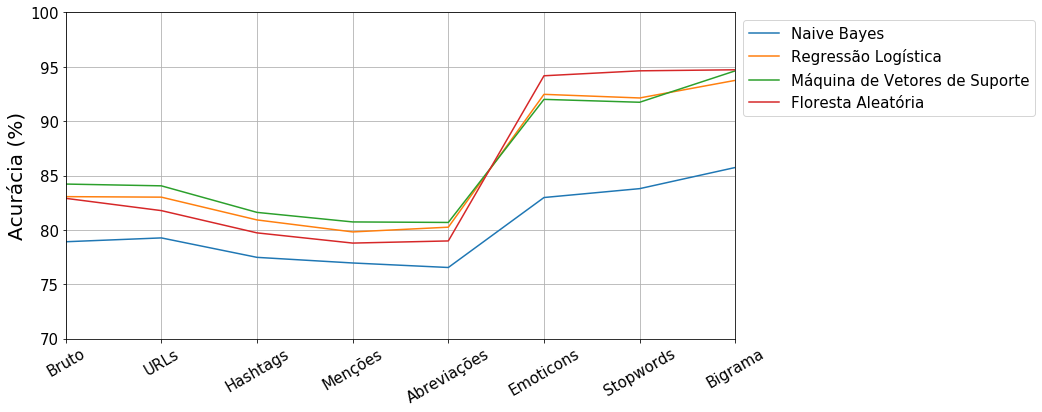

In [45]:
ax = score_modelos.mul(100, fill_value=0).plot(figsize=(12, 6), grid='True')
ax.set_ylabel('Acurácia (%)', fontsize=20)
ax.set_yticks([70, 75, 80, 85, 90, 95, 100])
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=15)
ax.legend(bbox_to_anchor=(1, 1), loc=0, fontsize=15)

# Salvando os modelos 

In [46]:
dump(modelo_MNB, 'naive_bayes.joblib') 
dump(modelo_LR, 'logistic_regression.joblib') 
dump(modelo_LSVM, 'linear_SVM.joblib') 
dump(modelo_RF, 'random_forest.joblib') 

['random_forest.joblib']

In [47]:
dump(tfidf_transformer, 'vectorizer.joblib')

['vectorizer.joblib']